In [41]:
import numpy as np 
import pandas as pd
import nltk

In [42]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [43]:
import re
#re is Python’s standard library for text pattern matching and manipulation,

In [44]:
data=pd.read_csv('IMDB-Movie-Data.csv')
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [45]:
print(data.columns)


Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')


In [46]:
# Remove rows with missing Description or Genre
data.dropna(subset=['Description', 'Genre'], inplace=True)

# Optional: rename columns to simplify further code
data.rename(columns={'Description':'plot', 'Genre':'genre'}, inplace=True)


In [36]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pritam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pritam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()


In [39]:
def clean_text(text):
    text=text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words=text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)
    data['clean_plot'] = data['plot'].apply(clean_text)

In [40]:
data.head()

,Rank,Title,genre,plot,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Exploratory Data Analysis (EDA

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

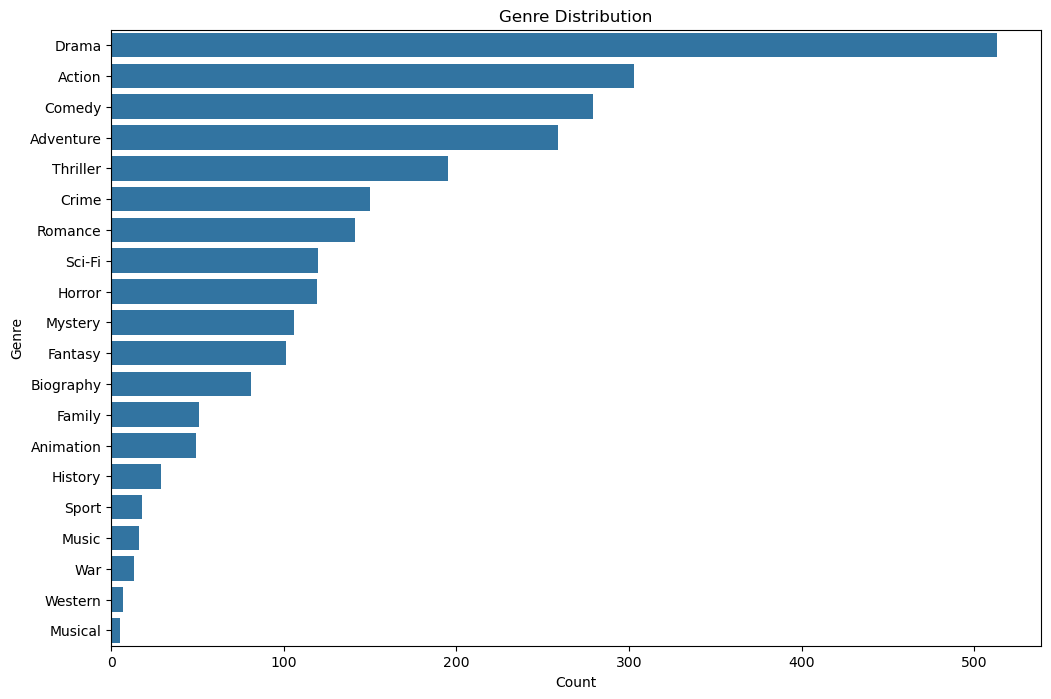

In [50]:
# Clean and explode genres if multiple genres per row
data_clean = data.dropna(subset=['genre'])
data_exploded = data_clean.assign(genre=data_clean['genre'].str.split(',')).explode('genre')
data_exploded['genre'] = data_exploded['genre'].str.strip()

plt.figure(figsize=(12,8))
sns.countplot(y='genre', data=data_exploded, order=data_exploded['genre'].value_counts().index)
plt.title("Genre Distribution")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


In [55]:
data['clean_plot'] = data['plot'].apply(clean_text)
print(data.columns)


Index(['Rank', 'Title', 'genre', 'plot', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'clean_plot'],
      dtype='object')


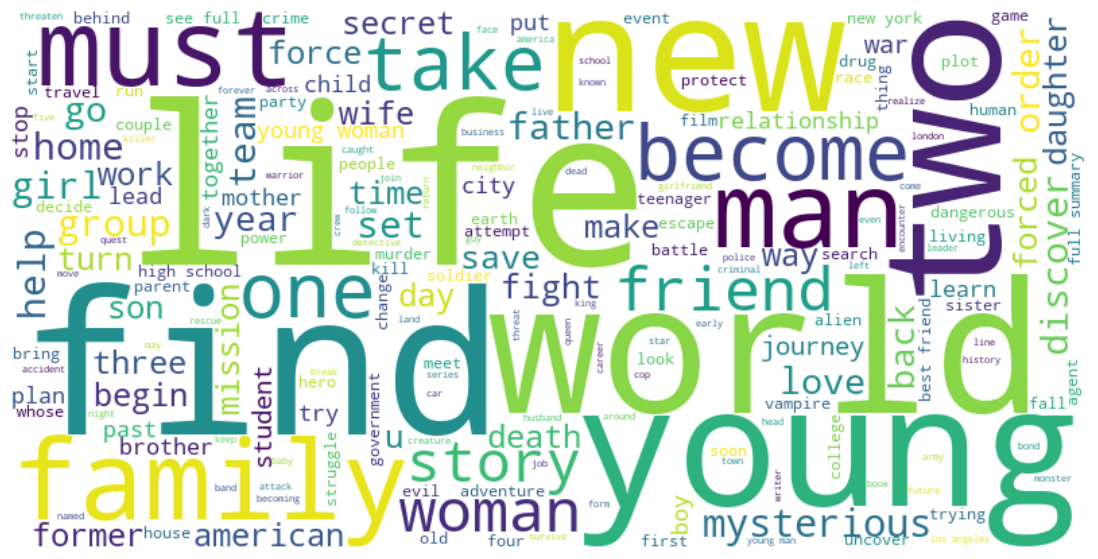

In [56]:
!pip install wordcloud

from wordcloud import WordCloud

text = " ".join(plot for plot in data['clean_plot'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Feature Extraction

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['clean_plot'])
y = data['genre']


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.075
                            precision    recall  f1-score   support

   Action,Adventure,Comedy       0.00      0.00      0.00         1
    Action,Adventure,Crime       0.00      0.00      0.00         2
    Action,Adventure,Drama       0.00      0.00      0.00         2
   Action,Adventure,Family       0.00      0.00      0.00         1
  Action,Adventure,Fantasy       0.00      0.00      0.00         8
   Action,Adventure,Horror       0.00      0.00      0.00         1
  Action,Adventure,Mystery       0.00      0.00      0.00         3
   Action,Adventure,Sci-Fi       0.11      1.00      0.20         9
    Action,Biography,Drama       0.00      0.00      0.00         2
             Action,Comedy       0.00      0.00      0.00         1
       Action,Comedy,Crime       0.00      0.00      0.00         2
     Action,Comedy,Fantasy       0.00      0.00      0.00         2
     Action,Comedy,Romance       0.00      0.00      0.00         1
        Action,Crime,Drama     

C:\Users\Pritam\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pritam\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pritam\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [64]:
# pickling the model
import pickle

pickle.dump(model, open("movie_genre_model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))


# make prediction on new data



In [65]:
def predict_genre(plot):
    plot_clean = clean_text(plot)
    vect = tfidf.transform([plot_clean])
    return model.predict(vect)[0]

predict_genre("A group of friends discover a hidden treasure in their city")

np.str_('Action,Adventure,Sci-Fi')